# Wrangle and Analyze Data
Is the fifth project in the Data Wrangling section in the Udacity [Data Analyst Nanodegree](https://eu.udacity.com/course/data-analyst-nanodegree--nd002) program.


## Context
__Goal__: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


[The weird underside of DoggoLingo](https://blog.oxforddictionaries.com/2017/08/01/doggolingo/)

In [1]:
import requests
import os, sys
import re
import pandas as pd
import numpy as np
import zipfile
import json
import twitter_api
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DOWNLOADS_DIR = 'downloads'
IMAGES_DIR = 'images'

def ensure_dir(file_path=DOWNLOADS_DIR):
    """
    Ensure directory exists or create it.
    :param file_path: directory path
    :return: 
    """
    if not os.path.exists(file_path):
        os.makedirs(file_path)

        
def download(*urls):
    """
    Download files from the provided URL.
    :param urls: variable number of URL
    :return: None
    """
    ensure_dir()
    for url in urls:
        url_file = os.path.join(DOWNLOADS_DIR, url.split(os.path.sep)[-1]).replace('-', '_')
        if not os.path.exists(url_file):
            response = requests.get(url, allow_redirects=True)
            with open(url_file, 'wb') as handle:
                handle.write(response.content)
                sys.stdout.write('.')
    sys.stdout.write('\n')


def download_img(name, url):
    """
    Download image from the provided URL
    :param name: name of image file
    :param url: URL for image
    :return: None
    """
    ensure_dir(IMAGES_DIR)
    image_file = os.path.join(IMAGES_DIR, f"{name}.{url.split('.')[-1]}")
    if not os.path.exists(image_file):
        response = requests.get(url, allow_redirects=True)
        with open(image_file, 'wb') as handle:
            handle.write(response.content)


def zip_extract(file):
    """
    Extract alla files from a zip archive.
    :param file: file name of archive.
    :return: a list of file names in the archive.
    """
    with zipfile.ZipFile(os.path.join(DOWNLOADS_DIR, file), 'r') as zip_ref:
        zip_ref.extractall(DOWNLOADS_DIR)
        return zip_ref.namelist()

def rename(file_from, file_to, directory=DOWNLOADS_DIR):
    """
    Rename file in the 
    :param file_from: Existing file to rename
    :param file_to: Target file name
    :param directory: Source directory, defaults to DOWNLOADS_DIR
    :return: None
    """
    source = os.path.join(directory, file_from)
    if os.path.exists(source):
        os.rename(source, os.path.join(directory, file_to))


def file_exists(filename, directory=DOWNLOADS_DIR):
    """
    Check if the file exists in a optional provided directory.
    :param filename: name of file
    :param directory: Source directory, defaults to DOWNLOADS_DIR
    :return: True if file exists.
    """
    return os.path.exists(os.path.join(directory, filename))

## Gather

In [39]:
# I collect tweet data throught the Twitter API. So these two files are not downloaded
#'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fc9_tweet-json/tweet-json.zip',
#'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json',

download('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv',
         'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
print(os.listdir(DOWNLOADS_DIR))


['.DS_Store', 'image_predictions.tsv', 'twitter_archive_enhanced.csv', 'tweet_json.txt']


In [40]:
# Rename file to addhere to the expected project submission
rename('image-predictions.tsv', 'image_predictions.tsv')
rename('twitter-archive-enhanced.csv', 'twitter_archive_enhanced.csv')
print(os.listdir(DOWNLOADS_DIR))

['.DS_Store', 'image_predictions.tsv', 'twitter_archive_enhanced.csv', 'tweet_json.txt']


```code
# Not needed since I collect data through the Twitter API
print(zip_extract('tweet-json.zip'))

# rename extracted file from tweet-json.zip
os.rename(os.path.join(DOWNLOADS_DIR, 'tweet-json copy'), os.path.join(DOWNLOADS_DIR, 'tweet.json'))
print(os.listdir(DOWNLOADS_DIR))
```

### Download Twitter Tweets

This code cell expects that a file `twitter_api.py` exists in the same folder as this notebook.
One function `get_api` should exists that returns a fully configured `tweepy.API` instance.

In [6]:
from tweepy import TweepError
tweets_file = os.path.join(DOWNLOADS_DIR, 'tweet_json.txt')
failures = []
if not os.path.exists(tweets_file):
    api = twitter_api.get_api()
    with open(tweets_file, 'w', encoding='utf-8') as file:  
        for tweet_id in twitter_df['tweet_id'].to_list():
            try:
                raw_tweet = api.get_status(tweet_id, tweet_mode='extended')
                file.write(json.dumps(raw_tweet._json))
                file.write('\n')
                sys.stdout.write('.')
            except TweepError as te:
                sys.stdout.write('X')
                failures.append(f'Tweet ID {tweet_id} failed: {te}')
        sys.stdout.write('\n')
    print(failures)
else:
    print(f'The file {tweets_file} already exist. Nothing downloaded.')

...................X...........................................................................X.....X..X.............X.............X......................X...........................................................................................X............X.....................................X...

Rate limit reached. Sleeping for: 397


................................................................................X...........................................................................................................................X...........................................................X.........................................................................................................................................................................................................................X.................................X.................................................................................................................X.............................................................................................................................................................................................................................................................................

Rate limit reached. Sleeping for: 647


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................X.......................................................................................................................................................................................................................................................................................................................................................................................

Rate limit reached. Sleeping for: 651


..............................................................................................................................................................................................................................................................
["Tweet ID 888202515573088257 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 873697596434513921 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872668790621863937 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872261713294495745 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 869988702071779329 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 866816280283807744 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 861769973181624320 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 845459076796616705 failed: [{'code': 144,

### Download Twitte Tweets output
...................X...........................................................................X.....X..X.............X.............X......................X...........................................................................................X............X.....................................X...  
Rate limit reached. Sleeping for: 397  
................................................................................X...........................................................................................................................X...........................................................X.........................................................................................................................................................................................................................X.................................X.................................................................................................................X.............................................................................................................................................................................................................................................................................  
Rate limit reached. Sleeping for: 647  
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................X.......................................................................................................................................................................................................................................................................................................................................................................................  
Rate limit reached. Sleeping for: 651  
..............................................................................................................................................................................................................................................................

["Tweet ID 888202515573088257 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 873697596434513921 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872668790621863937 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872261713294495745 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 869988702071779329 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 866816280283807744 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 861769973181624320 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 845459076796616705 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 842892208864923648 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 837012587749474308 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 827228250799742977 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 812747805718642688 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 802247111496568832 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 775096608509886464 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 770743923962707968 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 754011816964026368 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 680055455951884288 failed: [{'code': 144, 'message': 'No status found with that ID.'}]"]

### Load Pandas DataFrames

In [3]:
twitter_df = pd.read_csv(os.path.join(DOWNLOADS_DIR, 'twitter_archive_enhanced.csv'))

In [4]:
tweet_df = pd.read_json(os.path.join(DOWNLOADS_DIR, 'tweet_json.txt'), lines=True)

In [5]:
image_pred_df = pd.read_csv(os.path.join(DOWNLOADS_DIR, 'image_predictions.tsv'), sep='\t')

## Assess

### Data file twitter-archive-enhanced.csv

Problems identified in data set.

* tweet_id - convert to string, identity and not used for calculations
* timestamp - convert to datetime
* in_reply_to_status_id - only 78 posts, consider dropping column
* in_reply_to_user_id - only 78 posts, consider dropping column
* rating_numerator - quality issue with outliers, max value of 1776 and quartile 3 of 12
* rating_denominator - quality issue with outliers, max value of 170 and quartile 3 of 10
* name - None as null value, not only names in columns

Qualitative variables that could be stored in one column:
* doggo - None as null value
* floofer - None as null value
* pupper - None as null value
* puppo - None as null value


In [3]:
twitter_df.iloc[:5, :7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN


In [126]:
twitter_df.iloc[:5, 7:]

,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [127]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_df[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
            'retweeted_status_user_id', 'rating_numerator', 'rating_denominator']].describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
not_names = twitter_df[twitter_df['name'].str.match('^[a-z]')]['name']
not_names.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
actually         2
not              2
mad              2
this             1
unacceptable     1
space            1
infuriating      1
my               1
his              1
life             1
old              1
by               1
light            1
such             1
all              1
officially       1
incredibly       1
Name: name, dtype: int64

In [7]:
print(twitter_df['doggo'].value_counts(), '\n')
print(twitter_df['floofer'].value_counts(), '\n')
print(twitter_df['pupper'].value_counts(), '\n')
print(twitter_df['puppo'].value_counts(), '\n')

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



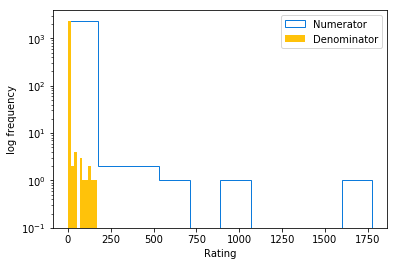

In [41]:
fig, ax = plt.subplots()
ax.hist(twitter_df['rating_numerator'], color='#0C7BDC', histtype='step', log=True, label='Numerator')
ax.hist(twitter_df['rating_denominator'], color='#FFC20A', histtype='stepfilled', log=True, label='Denominator')
ax.set_xlabel('Rating')
ax.set_ylabel('log frequency')
ax.legend()
fig.savefig(os.path.join(IMAGES_DIR, 'rating-histogram.jpg'))
plt.show();

### Data file tweet_json.txt 

Problems identified in data set.

Drop column since all values are missing:
* contributors
* coordinates 
* geo
* place - one row have value
* possibly_sensitive - all rows have zero (0)
* possibly_sensitive_appealable - all rows have zero (0)

* id - convert to string, identity
* source - categorical values can be extracted N{iphone, android}


In [4]:
tweet_df.iloc[:5,:8]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37786,False
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32465,False
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24439,False
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41115,False
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39330,False


In [172]:
tweet_df.iloc[:5,8:16]

,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id
0,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN
1,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN
2,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN
3,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN
4,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN


In [173]:
tweet_df.iloc[:5,16:24]

,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id
0,NaN,False,en,None,0.0,0.0,NaN,NaN
1,NaN,False,en,None,0.0,0.0,NaN,NaN
2,NaN,False,en,None,0.0,0.0,NaN,NaN
3,NaN,False,en,None,0.0,0.0,NaN,NaN
4,NaN,False,en,None,0.0,0.0,NaN,NaN


In [174]:
tweet_df.iloc[:5,24:]

,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,8236,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,6087,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,4028,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,8393,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,9090,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [7]:
tweet_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2339.000000,0.0,2.339000e+03,2.339000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2339.000000
mean,NaN,NaN,7900.328345,NaN,7.421620e+17,7.421620e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2903.433091
std,NaN,NaN,12245.660513,NaN,6.828729e+16,6.828729e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4895.523842
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1368.000000,NaN,6.783378e+17,6.783378e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,583.500000
50%,NaN,NaN,3438.000000,NaN,7.186133e+17,7.186133e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1354.000000
75%,NaN,NaN,9679.500000,NaN,7.986907e+17,7.986907e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3383.500000
max,NaN,NaN,163180.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82974.000000


### Data file image-predictions.tsv

Problems identified in data set.

* tweet_id - convert to string, identity  
* Prediction, p1, p2, and p3, should be separated into seperate rows instead of columns.

In [5]:
image_pred_df.iloc[:5,:6]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [194]:
image_pred_df.iloc[:5,6:]

,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,malinois,0.138584,True,bloodhound,0.116197,True
3,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,Rottweiler,0.243682,True,Doberman,0.154629,True


In [195]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Clean

### Cleaning twitter_df

Try to find more dogtionary words from the tweet text.  
Fix None values on the four columns: doggo, floofer, pupper, puppo.   
Reshape dogtionary names into one column.
Remove retweets.

In [139]:
dogtionary_words = ['doggo', 'floofer', 'floof', 'pupper', 'puppo']
columns_to_save = [col for col in twitter_df.columns.to_list() if col not in dogtionary_words]
columns_to_save.append('dogtionary')
columns_to_save

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogtionary']

In [140]:
dogtionary = twitter_df[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.NaN)
twitter_melted = pd.melt(dogtionary, id_vars='tweet_id', var_name='to_drop', value_name='dogtionary')[['tweet_id', 'dogtionary']].dropna()
twitter_clean_df = twitter_df.merge(twitter_melted, how='left', on='tweet_id')[columns_to_save]
twitter_clean_df['name'] = twitter_clean_df['name'].replace('None', np.NaN)
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id                      2370 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          1617 non-null object
dogtionary                    394 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 277.7+ KB


In [141]:
 twitter_clean_df['tweet_id'] = twitter_clean_df['tweet_id'].astype(str)

In [142]:
# Drop retweets
retweet_id_isnull = twitter_clean_df['retweeted_status_id'].isnull()
retweet_user_isnull = twitter_clean_df['retweeted_status_user_id'].isnull()
retweet_timestamp_isnull = twitter_clean_df['retweeted_status_timestamp'].isnull()

twitter_clean_df = twitter_clean_df[retweet_id_isnull | retweet_user_isnull | retweet_timestamp_isnull]
twitter_clean_df = twitter_clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 11 columns):
tweet_id                 2187 non-null object
in_reply_to_status_id    79 non-null float64
in_reply_to_user_id      79 non-null float64
timestamp                2187 non-null object
source                   2187 non-null object
text                     2187 non-null object
expanded_urls            2129 non-null object
rating_numerator         2187 non-null int64
rating_denominator       2187 non-null int64
name                     1500 non-null object
dogtionary               356 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 205.0+ KB


In [143]:
# Drop reply
reply_status_isnull = twitter_clean_df['in_reply_to_status_id'].isnull()
reply_user_isnull = twitter_clean_df['in_reply_to_user_id'].isnull()

twitter_clean_df = twitter_clean_df[reply_status_isnull | reply_user_isnull]
twitter_clean_df = twitter_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 9 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null object
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  1499 non-null object
dogtionary            347 non-null object
dtypes: int64(2), object(7)
memory usage: 164.7+ KB


In [144]:
# clean up unused variables
del columns_to_save
del dogtionary
del twitter_melted

Extract Dogtionary words from text column

In [145]:
matcher = re.compile(pattern='|'.join(dogtionary_words))
def extract_type(series):
    names = matcher.findall(series['text'])
    if len(names) > 0 and not series['dogtionary']:
        series['dogtionary'] = names[0]
    return series

names_df = twitter_clean_df[['tweet_id', 'text', 'dogtionary']].apply(extract_type, axis=1).dropna()
twitter_clean_df = twitter_clean_df.merge(names_df[['tweet_id', 'dogtionary']], how='left', on='tweet_id')
twitter_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary_x',
       'dogtionary_y'],
      dtype='object')

In [146]:
twitter_clean_df['dogtionary_x'].value_counts()

pupper     239
doggo       94
puppo       25
floofer     11
Name: dogtionary_x, dtype: int64

In [147]:
client_matcher = re.compile(pattern='>.*<')
twitter_clean_df['client'] = twitter_clean_df.source.apply(lambda x: client_matcher.findall(x)[0][1:-1])
twitter_clean_df.client.value_counts()

Twitter for iPhone     1994
Vine - Make a Scene      94
Twitter Web Client       31
TweetDeck                11
Name: client, dtype: int64

In [148]:
twitter_clean_df.rename(columns={'dogtionary_x': 'dogtionary'}, inplace=True)
columns_to_drop = ['expanded_urls', 'dogtionary_y', 'source']
twitter_clean_df.drop(columns_to_drop, axis=1, inplace=True)
twitter_clean_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogtionary', 'client'],
      dtype='object')

In [149]:
# Parse timestamp column
twitter_clean_df['timestamp'] = pd.to_datetime(twitter_clean_df.timestamp)
twitter_clean_df.timestamp.dtype

datetime64[ns, UTC]

### Cleaning tweet_df

In [163]:
tweet_clean_df = tweet_df.copy()
tweet_clean_df['id'] = tweet_clean_df['id'].astype(str)

In [164]:
# extract Twitter client
tweet_clean_df['client'] = tweet_df.source.apply(lambda x: x.split('"')[1].split('/')[-1])
tweet_clean_df['client'].value_counts()

iphone         2205
vine.co          91
twitter.com      33
tweetdeck        10
Name: client, dtype: int64

In [166]:
namePattern = re.compile('named ([A-Z]\w+)')
def extract_name(text):
    names = namePattern.findall(text)
    if names:
        return names[0]
    return np.NaN

tweet_clean_df['new_name'] = tweet_clean_df['full_text'].apply(extract_name)
tweet_clean_df[tweet_clean_df['new_name'].isnull() == False][['id', 'new_name']].set_index('id')
tweet_clean_df.new_name.value_counts()

Tickles      2
Alfonso      1
Johm         1
Klint        1
Alfredo      1
Guss         1
Leroi        1
Cheryl       1
Jessiga      1
Pepe         1
Zeus         1
Alphred      1
Rufus        1
Berta        1
Cherokee     1
Wylie        1
Chuk         1
Hemry        1
Octaviath    1
Kohl         1
Kip          1
Jacob        1
Spork        1
Name: new_name, dtype: int64

In [167]:
columns_to_drop = ['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweeted', 'client',
       'retweeted_status', 'source', 'truncated', 'user']
tweet_clean_df.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_clean_df.drop(columns_to_drop, axis=1, inplace=True)
tweet_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
favorite_count    2339 non-null int64
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
new_name          24 non-null object
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


### Cleaning of image_pred_df

In [154]:
pred_conf = pd.melt(image_pred_df, id_vars=['tweet_id', 'jpg_url'], value_vars=['p1_conf', 'p2_conf', 'p3_conf'], value_name='confidence', var_name='temp1')
pred_conf['group'] = pred_conf['temp1'].str[:2]
pred_conf.drop('temp1', axis=1, inplace=True)
pred_conf.head()

,tweet_id,jpg_url,confidence,group
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,p1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,p1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,p1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,p1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,p1


In [155]:
pred_dog = pd.melt(image_pred_df, id_vars='tweet_id', value_vars=['p1_dog', 'p2_dog', 'p3_dog'], value_name='is_dog', var_name='temp2')
pred_dog['group'] = pred_dog['temp2'].str[:2]
pred_dog.drop('temp2', axis=1, inplace=True)
pred_dog.head()

,tweet_id,is_dog,group
0,666020888022790149,True,p1
1,666029285002620928,True,p1
2,666033412701032449,True,p1
3,666044226329800704,True,p1
4,666049248165822465,True,p1


In [156]:
pred_breed = pd.melt(image_pred_df, id_vars='tweet_id', value_vars=['p1', 'p2', 'p3'], value_name='breed', var_name='group')
pred_breed.head()

,tweet_id,group,breed
0,666020888022790149,p1,Welsh_springer_spaniel
1,666029285002620928,p1,redbone
2,666033412701032449,p1,German_shepherd
3,666044226329800704,p1,Rhodesian_ridgeback
4,666049248165822465,p1,miniature_pinscher


In [157]:
pred_tidy = pred_conf.merge(pred_dog, on=['tweet_id', 'group']).merge(pred_breed, on=['tweet_id', 'group'])
pred_tidy.head()

,tweet_id,jpg_url,confidence,group,is_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,p1,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,p1,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,p1,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,p1,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,p1,True,miniature_pinscher


In [158]:
pred_tidy['tweet_id'] = pred_tidy['tweet_id'].astype(str)
pred_tidy['tweet_id'].dtype

dtype('O')

In [159]:
# clean up unused variables
del pred_conf
del pred_dog
del pred_breed

### Create Twitter archive master

In [168]:
master_df = twitter_clean_df.copy()

for row in tweet_clean_df[['tweet_id', 'new_name']].itertuples():
    x = master_df[master_df['tweet_id'] == str(row.Index)]
    if not x.empty:
        print(x[['tweet_id', 'name']], row.new_name)
        x['name'] = row.new_name

In [169]:
master_df = master_df.merge(tweet_clean_df, on='tweet_id', how='inner')
master_df = master_df.merge(pred_tidy, on='tweet_id', how='inner')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 0 to 5993
Data columns (total 16 columns):
tweet_id              5994 non-null object
timestamp             5994 non-null datetime64[ns, UTC]
text                  5994 non-null object
rating_numerator      5994 non-null int64
rating_denominator    5994 non-null int64
name                  4377 non-null object
dogtionary            999 non-null object
client                5994 non-null object
favorite_count        5994 non-null int64
retweet_count         5994 non-null int64
new_name              69 non-null object
jpg_url               5994 non-null object
confidence            5994 non-null float64
group                 5994 non-null object
is_dog                5994 non-null bool
breed                 5994 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(9)
memory usage: 755.1+ KB


In [177]:
name_isnull = master_df['name'].isnull()
#master_df[name_isnull]['jpg_url'].value_counts()
master_df[master_df['jpg_url'] == 'https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogtionary,client,favorite_count,retweet_count,new_name,jpg_url,confidence,group,is_dog,breed
435,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.321676,p1,True,flat-coated_retriever
436,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.115138,p2,True,Labrador_retriever
437,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.096100,p3,True,groenendael
438,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.321676,p1,True,flat-coated_retriever
439,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.115138,p2,True,Labrador_retriever
440,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.096100,p3,True,groenendael
441,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,puppo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.321676,p1,True,flat-coated_retriever
442,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,puppo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.115138,p2,True,Labrador_retriever
443,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,puppo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.096100,p3,True,groenendael
444,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13,10,NaN,puppo,Twitter for iPhone,45931,18137,NaN,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,0.321676,p1,True,flat-coated_retriever


In [178]:
REPORT_DATA_SET_FILE = 'twitter_archive_master.csv'
master_df.to_csv(REPORT_DATA_SET_FILE, index=False)

## Analysis

In [87]:
ensure_dir(IMAGES_DIR)

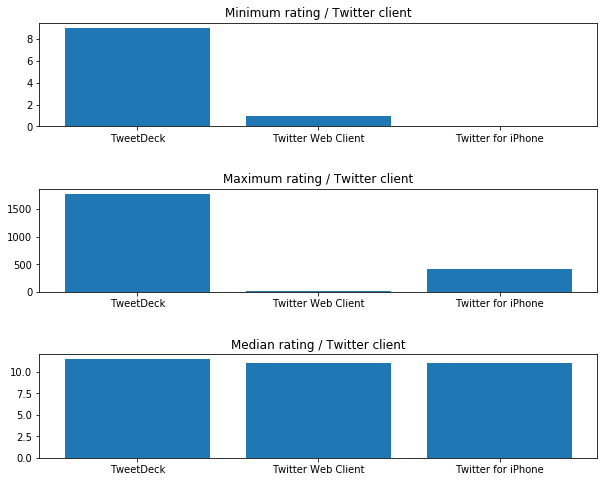

In [88]:
# Does the different Twitter clients rate dogs differently?
rating_client_agg = master_df.groupby('client', as_index=False).agg({'rating_numerator': ['min', 'max', 'median']})
rating_client_agg.columns = ['client', 'min', 'max', 'median']
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
ax1.bar(rating_client_agg['client'], rating_client_agg['min'])
ax1.set_title('Minimum rating / Twitter client')
ax2.bar(rating_client_agg['client'], rating_client_agg['max'])
ax2.set_title('Maximum rating / Twitter client')
ax3.bar(rating_client_agg['client'], rating_client_agg['median'])
ax3.set_title('Median rating / Twitter client')
plt.subplots_adjust(hspace=0.6)
fig.savefig(os.path.join(IMAGES_DIR, 'rating-client-outliers.jpg'))
plt.show()

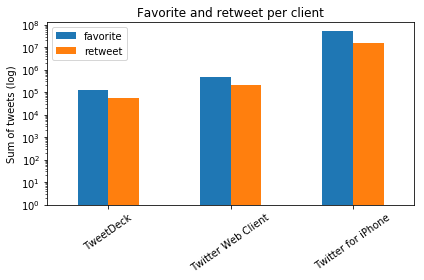

In [89]:
# How are the different Twitter clients used for setting favorites and retweets?
share_agg = master_df.groupby('client', as_index=False).agg({'favorite_count': ['sum'], 'retweet_count': ['sum']})
share_agg.columns = ['client', 'favorite', 'retweet']
ax = share_agg.plot('client', ['favorite', 'retweet'], kind='bar', log=True)
ax.set_title('Favorite and retweet per client')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation=35)
ax.set_ylabel('Sum of tweets (log)')
plt.tight_layout()
plt.savefig(os.path.join(IMAGES_DIR, 'favorite-and-retweet-per-client.jpg'))
plt.show()

In [90]:
share_agg

,client,favorite,retweet
0,TweetDeck,129936,57951
1,Twitter Web Client,485820,205461
2,Twitter for iPhone,52373670,15849624


In [164]:
# download random images for the report
import random
for i in range(3):
    download_img(f'dog-{i}.jpg', random.choice(pred_tidy.jpg_url.to_list()))
print(os.listdir(IMAGES_DIR))

['rating-histogram.jpg', 'rating-client-outliers.jpg', 'dog-1.jpg.jpg', 'dog-0.jpg.jpg', '.ipynb_checkpoints', 'dog-2.jpg.jpg', 'favorite-and-retweet-per-client.jpg']


In [102]:
master_df[master_df['group'] == 'p1'].groupby(['breed', 'name']).agg({'name': ['count']})

name
                                        count
breed                          name          
Afghan_hound                   Max          1
                               Moreton      1
                               Wesley       1
African_crocodile              Rodman       1
African_grey                   Scout        1
Airedale                       Billl        1
                               Furzey       1
                               Griffin      1
                               Koda         1
                               Linda        1
                               Mitch        1
                               Penny        1
                               Reese        1
                               Willie       1
American_Staffordshire_terrier Beebop       1
                               Brutus       1
                               Lucky        1
                               Lucy         1
                               Oliver       1
                               Pubert       1
                               Romeo        1
                               Rooney       1
                               Sage         1
                               Vincent      1
American_black_bear            Malcolm      1
Angora                         quite        1
Appenzeller                    Jax          1
Arctic_fox                     DayZ         1
                               Sandy        1
Australian_terrier             Oliviér      1
...                                       ...
washer                         Charlie      1
water_buffalo                  Derek        1
weasel                         Reptar       1
                               a            1
web_site                       Bo           1
                               Iggy         1
                               Koko         1
                               Moose        1
                               a            1
                               one          1
whippet                        Cooper       1
                               Godzilla     1
                               Lance        1
                               Larry        1
                               Miguel       1
                               Oliver       1
                               Scout        1
white_wolf                     Chet         1
wild_boar                      Elliot       1
window_shade                   Bella        1
                               Coleman      1
                               Sam          1
wire-haired_fox_terrier        Blu          1
                               Juno         1
wombat                         Baloo        1
                               Patrick      1
                               a            1
wood_rabbit                    Curtis       1
                               Jeffrie      1
wooden_spoon                   Ava          1

[1402 rows x 1 columns]

In [94]:
master_df[master_df.tweet_id == '675706639471788032']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogtionary,client,favorite_count,retweet_count,new_names,jpg_url,confidence,group,is_dog,breed
4539,675706639471788032,2015-12-12 15:59:51+00:00,This is a Sizzlin Menorah spaniel from Brookly...,10,10,a,NaN,Twitter for iPhone,657,102,Wylie,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,0.990300,p1,True,English_springer
4540,675706639471788032,2015-12-12 15:59:51+00:00,This is a Sizzlin Menorah spaniel from Brookly...,10,10,a,NaN,Twitter for iPhone,657,102,Wylie,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,0.002080,p2,True,Welsh_springer_spaniel
4541,675706639471788032,2015-12-12 15:59:51+00:00,This is a Sizzlin Menorah spaniel from Brookly...,10,10,a,NaN,Twitter for iPhone,657,102,Wylie,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,0.002014,p3,True,cocker_spaniel


# Assert project ready for submission
The following files needs to be included in the submission of the project

In [85]:
print(f"{file_exists('wrangle_act.ipynb', directory='.')} - wrangle_act.ipynb: code for gathering, assessing, cleaning, analyzing, and visualizing data")
print(f"{file_exists('wrangle_report.pdf', directory='.')} - wrangle_report.pdf or wrangle_report.html: documentation for data wrangling steps: gather, assess, and clean")
print(f"{file_exists('act_report.pdf', directory='.')} - act_report.pdf or act_report.html: documentation of analysis and insights into final data")
print(f"{file_exists('twitter_archive_enhanced.csv')} - twitter_archive_enhanced.csv: file as given")
print(f"{file_exists('image_predictions.tsv')} - image_predictions.tsv: file downloaded programmatically")
print(f"{file_exists('tweet_json.txt')} - tweet_json.txt: file constructed via API")
print(f"{file_exists('twitter_archive_master.csv', directory='.')} - twitter_archive_master.csv: combined and cleaned data")
      

True - wrangle_act.ipynb: code for gathering, assessing, cleaning, analyzing, and visualizing data
False - wrangle_report.pdf or wrangle_report.html: documentation for data wrangling steps: gather, assess, and clean
False - act_report.pdf or act_report.html: documentation of analysis and insights into final data
True - twitter_archive_enhanced.csv: file as given
True - image_predictions.tsv: file downloaded programmatically
True - tweet_json.txt: file constructed via API
True - twitter_archive_master.csv: combined and cleaned data
